## Подготовка данных

In [38]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [39]:
df = pd.read_csv('../data/classification/Absenteeism_at_work_processed.csv')

df = df.drop('Unnamed: 0', 1)

df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_by_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average_by_day         740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [41]:
df.mean()

ID                                  18.017568
Reason_for_absence                  19.216216
Month_of_absence                     6.324324
Day_of_the_week                      3.914865
Seasons                              2.544595
Transportation_expense             221.329730
Distance_from_Residence_to_Work     29.631081
Service_time                        12.554054
Age                                 36.450000
Work_load_Average_by_day           271.490235
Hit_target                          94.587838
Disciplinary_failure                 0.054054
Education                            1.291892
Son                                  1.018919
Social_drinker                       0.567568
Social_smoker                        0.072973
Pet                                  0.745946
Weight                              79.035135
Height                             172.114865
Body_mass_index                     26.677027
Absenteeism_time_in_hours            6.924324
dtype: float64

## Визуализация

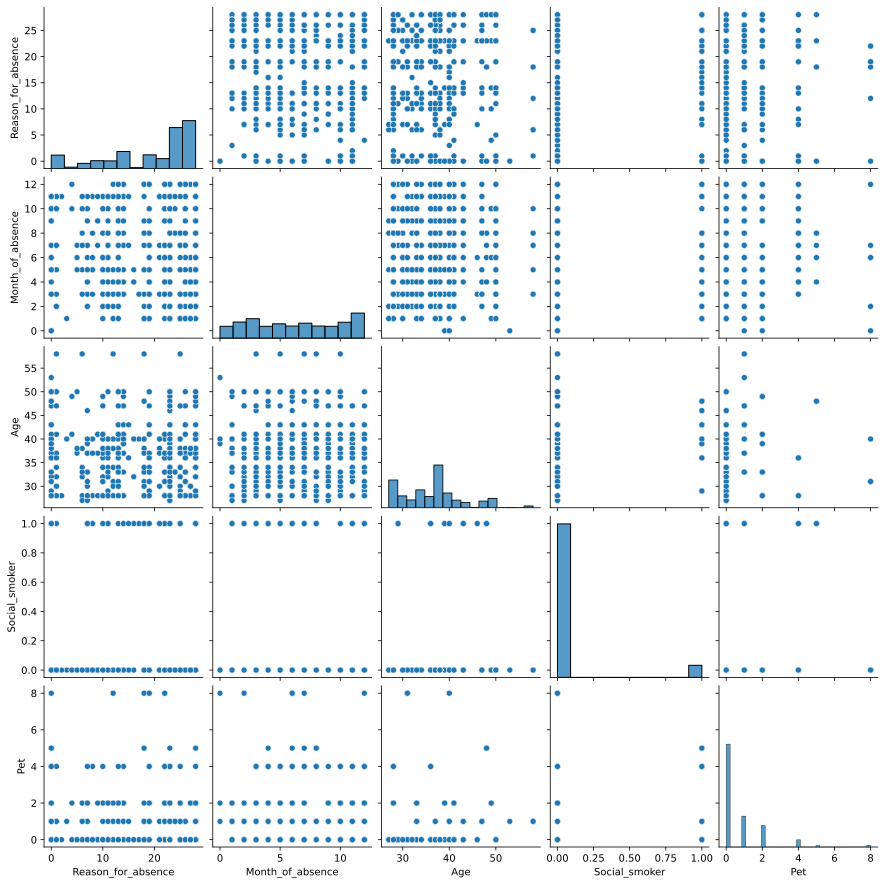

In [42]:
cols = ['Reason_for_absence', 'Month_of_absence', 'Age', 'Social_smoker', 'Pet']
sns.pairplot(df[cols].sample(frac=1).iloc[:1000])

Рассмотрим *Weight* и *Height* признаки подробнее

c:\users\huawei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\huawei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

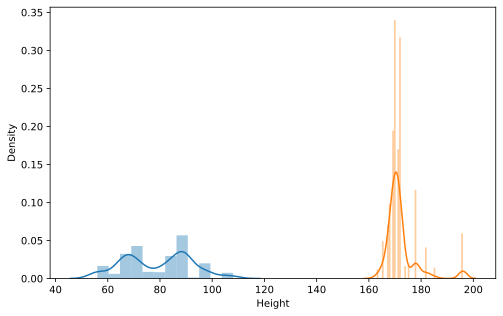

In [45]:
sns.distplot(df.Weight)
sns.distplot(df.Height)

По данным графиками можно сделать вывод, что распределение признака *Height* близко к **нормальному**, а *Weight* -- к **равномерному**


Посмотрим на "ящики с усами" для признака *Work_load_Average_by_day*

<AxesSubplot:xlabel='Work_load_Average_by_day', ylabel='Disciplinary_failure'>

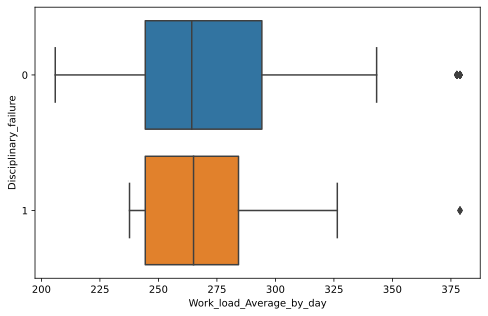

In [48]:
sns.boxplot(
    y='Disciplinary_failure',
    x='Work_load_Average_by_day',
    data=df[['Work_load_Average_by_day', 'Disciplinary_failure']],
    orient='h'
)

Видим, непосредственно, распределение этого признака относительно целевой переменной. Медиана для обоих значений *Disciplinary_failure* практически идентичны и равны примерно  **260**, для *Occupancy = 1* -- **900**
Данный вид визуализации корректно использовать для категориального признака, однако в датасете такого не присутствует. Однако целевая переменная может подойти для этого

